In [1]:
import math as m
import os
import pathlib as p
import pprint as pp

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as s
import seaborn as sns

In [2]:
HOME_PATH = p.Path(os.getcwd())
DATA_PATH = HOME_PATH.joinpath('data')

np.random.seed(42)

## Atividade A

In [3]:
# Cria duas distribuições  com 9 valores, sendo que a segunda é uniforme
limit_down = 0
limit_up = 99
size = 9

x_dist = np.random.randint(low=limit_down, high=limit_up, size=size)
y_value = np.random.randint(low=limit_down, high=limit_up, size=1)
y_dist = np.repeat(y_value, size)

print(x_dist)
print(y_dist)

[51 92 14 71 60 20 82 86 74]
[74 74 74 74 74 74 74 74 74]


In [4]:
# Cria DataFrame a partir das distribuições
data = {'X': x_dist, 'Y': y_dist}
df = pd.DataFrame(data)

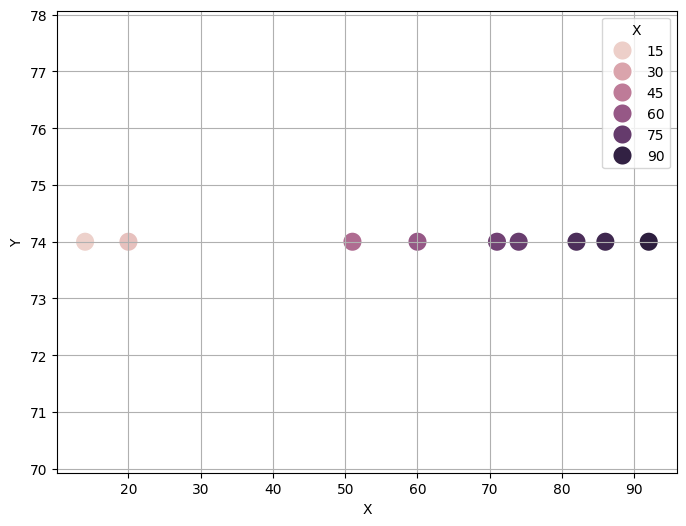

In [5]:
# Plota gráfico de dispersão das distribuições
plt.figure(figsize=(8, 6))
plt.grid(True)
sns.scatterplot(x='X', y='Y', data=df, hue=df['X'], s=200)
plt.show()

In [6]:
# Calcula linha de relação entre as distribuições
lr = s.linregress(x_dist, y_dist)

print(lr)

LinregressResult(slope=np.float64(0.0), intercept=np.float64(74.0), rvalue=0.0, pvalue=np.float64(1.0), stderr=np.float64(0.0), intercept_stderr=np.float64(0.0))


### Análise sobre a Regressão Linear e o _P-Value_

É possível averiguar que a função `s.linregress`, que calcula a regressão linear entre duas distribuições, retorna que a inclinação da reta é `0` e que o ponto de intersecção é `74`. Isso faz sentido em razão da distribuição `Y` ser uniforme justamente no valor 74, o que faz com que uma linha horizontal no ponto `74` do eixo `Y` consiga demonstrar a relação entre as duas distribuições.

Além disso, é possível conferir que o _P-value_ calculado foi `1`. Considerando que a hipótese nula diz assume que não há uma relação linear significativa entre as distribuições e, por consequência, que o _slope_ (inclinação) é `0`, pode-se dizer que o _P-value_ confirma o que foi descrito no parágrafo anterior, pois, como seu valor é alto (acima do limiar comumente usado de `0.05`), não é possível rejeitar a hipótese nula.

Tudo isso se justifica pelo comportamento constante de `Y`, já que se mantém sempre em `74` independentemente do valor de `X`, o que reafirma o que foi dito anteriormente sobre não existir relação linear entre as duas distribuições, já que o valor de `Y` não muda.

In [7]:
# Utiliza informações calculadas para montar array com os pontos da linha
line = lr.slope * x_dist + lr.intercept

print(line)

[74. 74. 74. 74. 74. 74. 74. 74. 74.]


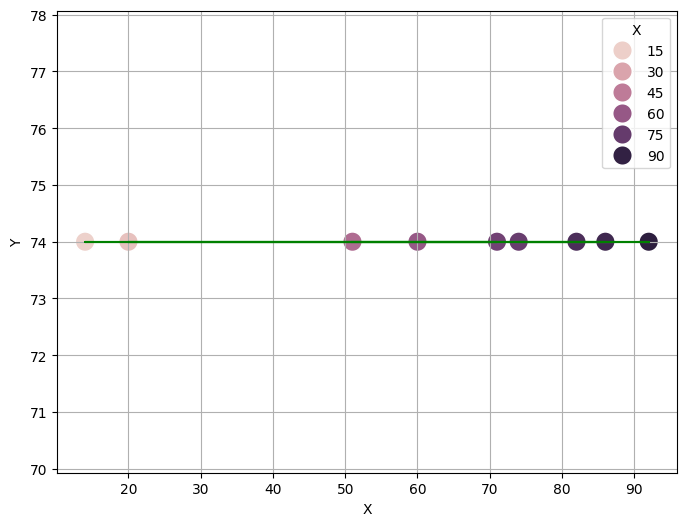

In [8]:
# Plota gráfico com a linha de relação das distribuições
plt.figure(figsize=(8, 6))
plt.grid(True)
sns.scatterplot(data=df, x='X', y='Y', hue=df['X'], s=200)
plt.plot(df['X'], line, color='green')
plt.show()

In [9]:
# Cálculo da matriz de covariância
np.cov(x_dist, y_dist)

array([[785.86111111,   0.        ],
       [  0.        ,   0.        ]])

### Análise sobre a Covariância

De acordo com a ordem do que foi passado na função `np.cov`, a covariância entre `X` e `Y` está presente nas posições `[0, 1]` e `[1, 0]`, de forma que a covariância entre as distribuiçoes é `0`.

Isso faz sentido, pois foi visto que a inclinação da regressão linear foi `0` também e, como a covariância tem a função principal de indicar o sentido de inclinação da reta, era esperado que seu valor de fato fosse `0`, mostrando que não há inclinação na reta e, por consequência, não há relação linar entre as distribuições.

Outra razão para o valor estar correto é a não variação da distribuição `Y` conforme `X` varia.

In [10]:
# Cálculo da matriz de correlação
np.corrcoef(x_dist, y_dist)

/home/gabriel/mestrado/p-value-confidence-intervals-correlation/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/gabriel/mestrado/p-value-confidence-intervals-correlation/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([[ 1., nan],
       [nan, nan]])

### Análise sobre a Correlação

Analogamente à análise sobre covariância, a correlação também tem valor `0`, provando mais uma vez que não há relação linar sobre as distribuições em razão de todos os motivos descritos nas análises anteriores.

## Atividade B

O _Dataset_ utilizado é o ___Heights and Weights Dataset___, com informações de pesos e alturas de 25 mil indivíduos._

O conjunto de dados pode ser encontrado no [Kaggle](https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset).

In [11]:
# Realiza leitura do arquivo com dados
data_file_path = DATA_PATH.joinpath('SOCR-HeightWeight.csv')

data = pd.read_csv(data_file_path)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [13]:
data.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [14]:
# Renomeia colunas e remove coluna redundante de índice
data.rename(columns={'Height(Inches)': 'height', 'Weight(Pounds)': 'weight'}, inplace=True)
data.drop(columns=['Index'], inplace=True)

In [15]:
population = data['weight']

# Calcula média e desvio padrão da população
population_mean = population.mean()
population_std = population.std()

In [16]:
# Cria amostra a partir da população
size = 50
sample = np.random.choice(population, size=size)

In [17]:
# Calcula média e desvio padrão da amostra
sample_mean = sample.mean()
sample_std = sample.std()

In [18]:
# Salva diferentes níveis de confiança
confidence_levels = (0.9, 0.95, 0.99)

confidence_intervals = dict()

# Calcula intervalo de confiança para cada nível de confiança
for confidence_level in confidence_levels:
    alpha = 1 - confidence_level
    t_critical = s.t.ppf(1 - (alpha / 2), size - 1)
    
    lower_limit = sample_mean - (t_critical * (sample_std / m.sqrt(size)))
    higher_limit = sample_mean + (t_critical * (sample_std / m.sqrt(size)))

    confidence_intervals[confidence_level] = {'Intervalo de Confiança': (lower_limit, higher_limit), 'Tamanho do Intervalo': higher_limit - lower_limit}

pp.pprint(confidence_intervals)

{0.9: {'Intervalo de Confiança': (np.float64(123.46134425639762),
                                  np.float64(129.21014094360237)),
       'Tamanho do Intervalo': np.float64(5.748796687204745)},
 0.95: {'Intervalo de Confiança': (np.float64(122.89038358442448),
                                   np.float64(129.7811016155755)),
        'Tamanho do Intervalo': np.float64(6.89071803115101)},
 0.99: {'Intervalo de Confiança': (np.float64(121.74104192740855),
                                   np.float64(130.93044327259142)),
        'Tamanho do Intervalo': np.float64(9.189401345182873)}}


In [19]:
print(f'Média da Amostra: {sample_mean}')
print(f'Média da Amostra: {population_mean}')

Média da Amostra: 126.33574259999999
Média da Amostra: 127.07942116080001


### Análise

Conforme visto, o aumento do nível de confiança nos intervalos gerou intervalos de tamanho maior, o que faz sentido já que o aumento do intervalo aumenta a chance de acerto que a média da população estará dentro do intervalo.

Todos os intervalos contém a média real da população. Assim, entende-se que faz sentido usar o nível `0.95` por ter uma boa margem de segurança.

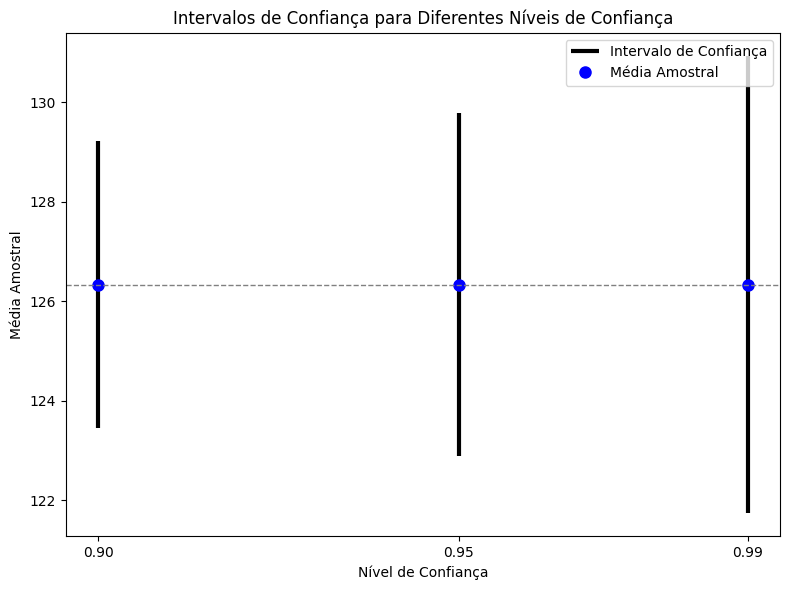

In [20]:
lower_limits = [interval['Intervalo de Confiança'][0] for interval in confidence_intervals.values()]
higher_limits = [interval['Intervalo de Confiança'][1] for interval in confidence_intervals.values()]

# Plota os intervalos de confiança
fig, ax = plt.subplots(figsize=(8, 6))

ax.vlines(confidence_levels, lower_limits, higher_limits, color='black', linewidth=3, label='Intervalo de Confiança')
ax.plot(confidence_levels, np.repeat(sample_mean, len(confidence_levels)), 'o', color='blue', markersize=8, label='Média Amostral')
ax.axhline(y=sample_mean, color='gray', linestyle='--', linewidth=1)

ax.set_xticks(confidence_levels)
ax.set_xlabel('Nível de Confiança')
ax.set_ylabel('Média Amostral')
ax.set_title('Intervalos de Confiança para Diferentes Níveis de Confiança')
ax.legend()
plt.tight_layout()
plt.show()

### Atividade C

In [21]:
# Criação de duas distribuições
control = np.random.normal(loc=10, scale=2, size=100)
test = np.random.normal(loc=10, scale=5, size=300)

Pode-se formular uma hipótese nula da seguinte maneira: __a média do grupo de teste é igual à média do grupo de controle__.

Para averiguar isso, deve-se fazer um _T-test_.

In [22]:
# Realiza o T-test entre as médias
s.ttest_ind(control, test)

TtestResult(statistic=np.float64(0.18215980700020176), pvalue=np.float64(0.855550057535596), df=np.float64(398.0))

### Análise

Como o _P-value_ resultou em `0.13`, nós não rejeitamos a hipótese nula, em razão de o valor ser maior que o limiar comumente usado `0.05`.

Como neste exemplo as médias das populações são conhecidas, é possível confirmar que o _P-value_ é condizente com a realidade.

## Atividade E

In [23]:
# Salva as informações da amostra presentes no slide
sample_size = 50
sample_mean = 75.9
sample_std = 13.36

### Intervalo de Confiança para Estimativa de Média

In [24]:
# Cálculo do t-critical usando nível de confiança de 95% e grau de liberdade n - 1
confidence_level = 0.975

t_critical = s.t.ppf(confidence_level, sample_size - 1)

print(t_critical)

2.0095752371292397


In [25]:
# Cálculo dos limites do intervalo de confiança para estimatva da média da população com base na amostra
lower_limit = sample_mean - (t_critical * (sample_std / m.sqrt(sample_size)))
higher_limit = sample_mean + (t_critical * (sample_std / m.sqrt(sample_size)))

print((round(lower_limit, 1), round(higher_limit, 1)))

(np.float64(72.1), np.float64(79.7))
